# Classification of Intel image dataset with AlexNet

#AlexNet Architecture:
#AlexNet consists of 8 layers, including 5 convolutional layers and 3 fully connected layers. It uses traditional stacked convolutional layers with max-pooling in between. Its deep network structure allows for the extraction of complex features from images.

#The architecture employs overlapping pooling layers to reduce spatial dimensions while retaining the spatial relationships among neighbouring features.

#Activation function: AlexNet uses the ReLU activation function and dropout regularization, which enhance the model’s ability to capture non-linear relationships within the data.



Intel image dataset consist of images of Natural Scenes around the world. The data contains around 25k images of size 150x150 distributed under 6 categories: buildings, forest, glacier, mountain, sea, street.

AlexNet is the a convolutional neural network (CNN) architecture, designed by Alex Krizhevsky in collaboration with Ilya Sutskever and Geoffrey Hinton. Initially, AlexNet was built to perform multiclass image classification on ImageNet dataset where it acheived 83.6% accuracy rate. You can find the paper [here](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf).

##### In this notebook AlexNet architecture is used for classification of images.


## Table of Content

- [1 - Packages](#1)
- [2 - Preprocessing and splitting data into Train and Test](#2)
- [3 - Creating AlexNet model](#3)
- [4 - Training the model](#4)
    - [4.1 - Training the model with not augmented data](#4-1)
    - [4.2 - Training the same model with augmented data](#4-2)
- [5 - Making Predictions](#5)
- [6 - Analysing results](#6)

<a name='1'></a>
## 1 - Packages

In [ ]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from image_data_generator import image_data_generator_train, image_data_generator_valid, image_data_generator_test

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout

<a name='2'></a>
## 2 - Generating data for Training, Validation and Testing

In [ ]:
# Preprocessing and augmenting datasets
train_generator = image_data_generator_train('Data/Train')
valid_generator = image_data_generator_valid('Data/Valid')
test_generator = image_data_generator_test('Data/Test')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


<a name='3'></a>
## 3 - Creating the AlexNet model

![image-2.png](attachment:image-2.png)

(The model in this photo represent AlexNet used for ImageNet classification, thus, dimentions are not correct.)

In [ ]:
# Creating AlexNet network
def model(input_shape):
    model = keras.Sequential()

    # Layer 1
    model.add(Conv2D(96, (11, 11), strides=4, input_shape = input_shape))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(3, 3), strides=2))

    # Layer 2
    model.add(Conv2D(256, (5, 5), strides=1, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(3, 3), strides=2))

    # Layer 3, 4, and 5
    model.add(Conv2D(384, (3, 3), strides=1, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(384, (3, 3), strides=1, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), strides=1, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(3, 3), strides=2))

    # Layer 6
    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Activation('relu'))

    # Layer 7
    model.add(Dropout(0.5))
    model.add(Dense(4096))
    model.add(Activation('relu'))

    # Layer 8
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))

    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    return model

model = model((150, 150, 3))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 35, 35, 96)        34944     
                                                                 
 activation_7 (Activation)   (None, 35, 35, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       614656    
                                                                 
 activation_8 (Activation)   (None, 17, 17, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                  

<a name='4'></a>
## 4 - Training the model

In [ ]:
# Defining step sizes for training and validation
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

# Training the model
history = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
            validation_data=valid_generator, validation_steps=STEP_SIZE_VALID, epochs=10)

# Saving the model
model.save('Pretrained\AlexNet_model_V2.h5')

Epoch 1/10
438/438 [==============================] - 507s 1s/step - loss: 1.1670 - accuracy: 0.5257 - val_loss: 0.8645 - val_accuracy: 0.6694
Epoch 2/10
438/438 [==============================] - 488s 1s/step - loss: 0.8387 - accuracy: 0.6849 - val_loss: 0.8148 - val_accuracy: 0.6946
Epoch 3/10
438/438 [==============================] - 459s 1s/step - loss: 0.7072 - accuracy: 0.7448 - val_loss: 0.6506 - val_accuracy: 0.7698
Epoch 4/10
438/438 [==============================] - 552s 1s/step - loss: 0.6296 - accuracy: 0.7717 - val_loss: 0.5948 - val_accuracy: 0.7876
Epoch 5/10
438/438 [==============================] - 515s 1s/step - loss: 0.5882 - accuracy: 0.7891 - val_loss: 0.5616 - val_accuracy: 0.7964
Epoch 6/10
438/438 [==============================] - 451s 1s/step - loss: 0.5370 - accuracy: 0.8060 - val_loss: 0.5721 - val_accuracy: 0.7890
Epoch 7/10
438/438 [==============================] - 451s 1s/step - loss: 0.4939 - accuracy: 0.8248 - val_loss: 0.5563 - val_accuracy: 0.7967

<a name='5'></a>
## 5 - Making Predictions

In [ ]:
# Loading the trained model
pretrained_model = keras.models.load_model('Pretrained/AlexNet_model_V2.h5')

Found 4 images belonging to 1 classes.
4/4 [==============================] - 0s 30ms/step
Predictions: 


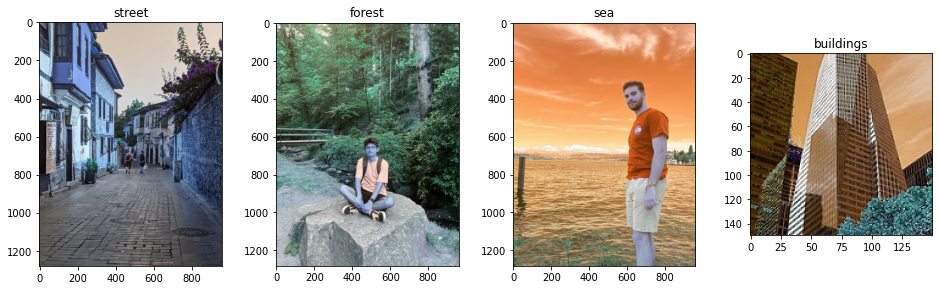

In [ ]:
# Loading image directory
img_dir = "Data/Pred"

# Preprocessing images
pred_generator = image_data_generator_test(img_dir)

# Making predictions
prediction = pretrained_model.predict(pred_generator, verbose=1)
predicted_class_indices = np.argmax(prediction, axis=1)

# Classifying predictions
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_class_indices
predictions = [labels[k] for k in predicted_class_indices]

print("Predictions: ")

# Create a figure with 6 subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 10))

# Plot the data in each subplot
for image, i in zip(os.listdir(img_dir+'/Pred_folder'), range(len(os.listdir(img_dir+'/Pred_folder')))):
    img = cv2.imread(os.path.join(img_dir+'/Pred_folder', image))
    axs[i].imshow(img)
    axs[i].set_title(predictions[i])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()

<a name='6'></a>
## 6 - Analysing Results

##### In conclusion, accuracy ratings of 85% and 82% were obtained in training and validation datasets respectfully. These results are not possible if the data is not augmented, as it leads to overfitting (based on previous experience not shown here).

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

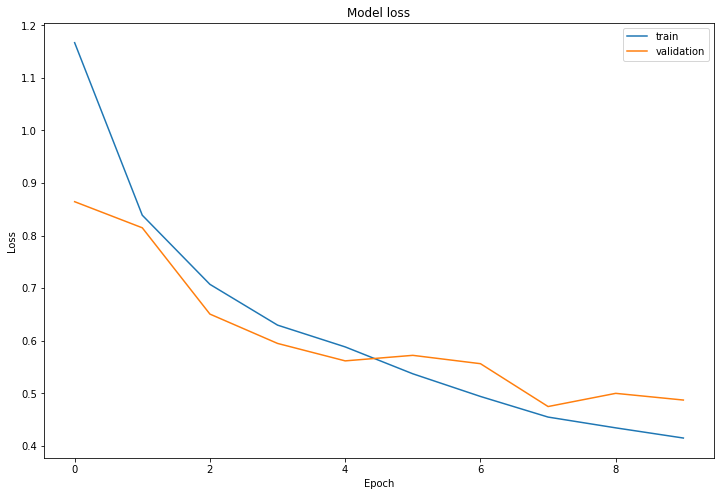

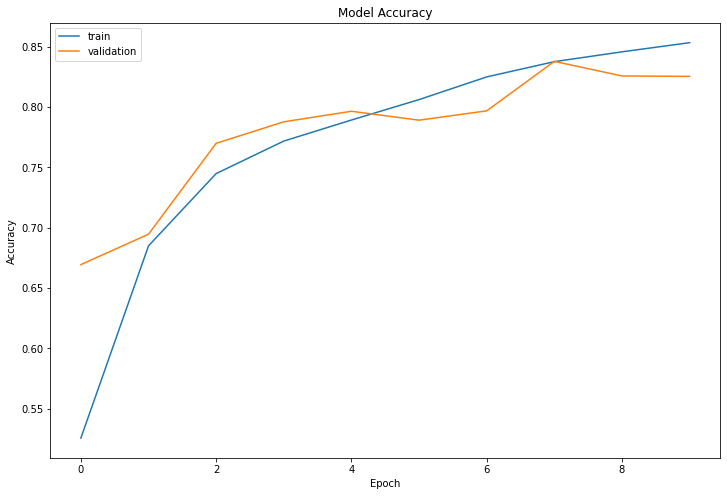

In [ ]:
# Plotting loss and accuracy
import warnings
warnings.filterwarnings('ignore')
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')